## Confusion Matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Counting amount between prediction and actual values

In [2]:
ya = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
yp = [0, 0, 0, 1, 1, 0, 0, 1, 1, 1]

- | Prediction 0 | Prediction 1
- | - | -
__Actual 0__ | 3 | 2
__Actual 1__ | 2 | 3

#### Using Sklearn

In [3]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ya, yp)
cm

array([[3, 2],
       [2, 3]])

In [6]:
df = pd.DataFrame(
    cm, columns= ["Prediction 0", "Prediction 1"],
    index= ["Actual 0", "Actual 1"]
)
df

,Prediction 0,Prediction 1
Actual 0,3,2
Actual 1,2,3


#### Plot Confusion Matrix with Seaborn

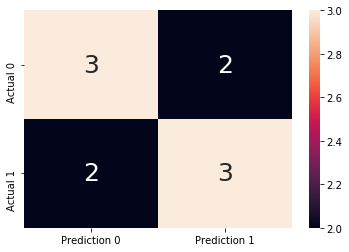

In [7]:
sb.heatmap(df, annot=True, annot_kws={"size" : 25})

#### Plot Confusion Matrix with Sklearn Method

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [10]:
x = np.arange(1,11)
y = np.array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

model = LogisticRegression(solver= "lbfgs")
model.fit(x.reshape(-1, 1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
yp = model.predict(x.reshape(-1, 1))
yp

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [12]:
print (y)
print (yp)

[0 0 0 0 1 0 1 0 1 1]
[0 0 0 0 0 0 1 1 1 1]


- | Prediction 0 | Prediction 1
- | - | -
__Actual 0__ | 5 | 1
__Actual 1__ | 1 | 3

In [13]:
cm = confusion_matrix(y, yp, labels=[0, 1])
cm

array([[5, 1],
       [1, 3]])

^ default format

In [14]:
cm = confusion_matrix(y, yp, labels=[1, 0])
cm

array([[3, 1],
       [1, 5]])

In [15]:
cm = confusion_matrix(y, yp, labels=[0, 1])
df = pd.DataFrame(
    cm, columns=["Prediction 0", "Prediction 1"], index= ["Actual 0", "Actual 1"]
)
df

,Prediction 0,Prediction 1
Actual 0,5,1
Actual 1,1,3


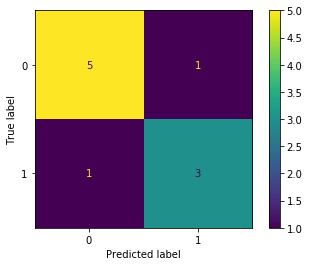

In [16]:
plot_confusion_matrix(model, x.reshape(-1, 1), y)

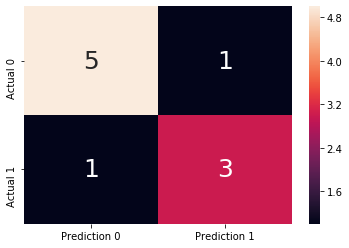

In [17]:
sb.heatmap(df, annot=True, annot_kws={"size" : 25})

### Evaluation Metrics from Confusion Matrix

- __True__ : if y pred = y act 
- __False__ : if y pred != y act
- __Positive__ : model y pred = 1
- __Negative__ : model y pred = 0

Classification :

- __True Positive (TP)__ : y = 1 & yp = 1
- __True Negative (TN)__ : y = 1 & yp = 0
- __False Positive (FP)__ : y = 0 & yp = 1
- __False Negative (FN)__ : y = 1 & yp = 0

In [18]:
df

,Prediction 0,Prediction 1
Actual 0,5,1
Actual 1,1,3


In [21]:
tn, fp, fn, tp = confusion_matrix(y, yp).ravel()
tn, fp, fn, tp

(5, 1, 1, 3)

<hr>

1. __Accuracy__ : Probabilitas prediksi benar

    $\displaystyle \frac {tp + tn} {total_{DATA}}$

2. __Inaccuracy / Error Rate / Misclassification Rate__ : Probabilitas prediksi benar

    $\displaystyle \frac {fp + fn} {total_{DATA}}$

3. __TP Rate / Sensitivity / Recall (positif)__ : Probabilitas jika y = 1 dan yp = 1

    $\displaystyle \frac {tp} {totalActual_1}$

4. __FP Rate__ : Probabilitas jika y = 0 dan yp = 1

    $\displaystyle \frac {fp} {totalActual_1}$

5. __TN Rate / Specificity / Selectivity / Recall (negatif)__ : Probabilitas jika y = 0 dan yp = 0 | >< FP Rate

    $\displaystyle \frac {tn} {totalActual_0}$

6. __FN Rate__ : Probabilitas jika y = 1 dan yp = 0 | >< TP Rate

    $\displaystyle \frac {fn} {totalActual_1}$

7. __Precision__ : Probabilitas jika yp = 1 dan benar

    $\displaystyle \frac {tp} {totalPrediksi_1}$

8. __Prevalence__ : Probabilitas jika y = 1

    $\displaystyle \frac {tp + fn} {total_{DATA}}$

9. __Null Error Rate__ : Probabilitas jika y = 0

    $\displaystyle \frac {tn + fp} {total_{DATA}}$

10. __F1 Score__ : Rerata harmoni Precision (+) dan Recall (+)
    
    $\displaystyle 2 * \frac {precision_{positive} * recall_{positive}} {precision_{positive} + recall_{positive}}$

11. __Balanced Accuracy__ : Rerata Recall(+) dan Recall (-)
    
    $\displaystyle \frac {recall_{positive} + recall_{negative}} {2}$

In [49]:
print("1. Akurasi :", (tp + tn) / len(y))
print("2. Error Rate :", (fp + fn) / len(y))
print("3. TPrate / Recall+ :", tp / (tp + fn))
print("4. FPrate :", fp / (fp + tn))
print("5. TNrate / Recall- :", tn / (fp + tn))
print("6. FNrate :", fn / (tp + fn))
print("7a. Precision+ :", tp / (tp + fp))
print("7b. Precision- :", 1 -  (tp / (tp + fp)))
print("8. Prevalence :", (tp + fn) / len(y))
print("9. Null Error Rate :", (fp + tn) / len(y))
print("10. F1 Score :", 2 * (((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn)))))
print("11. bACC :", ((tp / (tp + fn)) + (tn / (fp + tn))) / 2 )

1. Akurasi : 0.8
2. Error Rate : 0.2
3. TPrate / Recall+ : 0.75
4. FPrate : 0.16666666666666666
5. TNrate / Recall- : 0.8333333333333334
6. FNrate : 0.25
7a. Precision+ : 0.75
7b. Precision- : 0.25
8. Prevalence : 0.4
9. Null Error Rate : 0.6
10. F1 Score : 0.75
11. bACC : 0.7916666666666667
